Author : Mohlatlego Nakeng, MIT(Big data sciecnes), University of Pretoria

In [27]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
import string

In [28]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [29]:
data = pd.read_csv("MMA_complaints.csv")

In [30]:
data.columns

Index(['Unnamed: 0', 'id', 'source_url', 'title', 'overview', 'outcome',
       'status', 'platform', 'asset_urls', 'asset_text_extracts',
       'created_at'],
      dtype='object')

In [31]:
data.head(1)

,Unnamed: 0,id,source_url,title,overview,outcome,status,platform,asset_urls,asset_text_extracts,created_at
0,0,1813,https://twitter.com/PartyOfAction,NaN,NaN,NaN,Final Edit,Twitter,https://s3-eu-west-1.amazonaws.com/complaints-...,PARTY OF ACTION - Political Party IEC Register...,2021-09-17 08:21:03


In [32]:
df = data[[ "created_at", "asset_text_extracts"]]

In [33]:
df.head()

,created_at,asset_text_extracts
0,2021-09-17 08:21:03,PARTY OF ACTION - Political Party IEC Register...
1,2021-09-17 11:21:14,NaN
2,2021-09-22 06:21:53,a\n21% I 6:52\nNaeem Patel\n5\nminutes.ag9go\n...
3,2021-09-22 14:20:55,-27820070059\nUse OTP 517392 to proceed with\n...
4,2021-09-24 10:32:18,NaN


In [34]:
df =df.dropna()

In [35]:
df.asset_text_extracts

0     PARTY OF ACTION - Political Party IEC Register...
2     a\n21% I 6:52\nNaeem Patel\n5\nminutes.ag9go\n...
3     -27820070059\nUse OTP 517392 to proceed with\n...
5                                                    | 
6     IT IS NOT\nCORRUPTION IF\nIT IS BLACK\n#REVOLU...
7     SAMPLE BALLOT PAPER\nDISTRICT COUNCIL PARTY VO...
9     DA\nSkip the lines\nVote early!\nIf you are a ...
12    THE\nANC\nCALLED\nYOU\nRACISTS\nTHE\nDA\nCALLS...
14    12:03\n3ul\nVo))\n4G\nS\nLTE\nSign in to Stand...
15            IVERNMENTA\nETIONS 2021\nDE\nANC\n2021 | 
16    11:25\n81160061006393\nMonday, Sep 20 . 15:45\...
17                                                   | 
20    Herman Mashaba a\n@HermanMashaba\nAs @Action4S...
21    Herman Mashaba\n@HermanMashaba\nI am sorry fel...
Name: asset_text_extracts, dtype: object

In [36]:
documents = df.asset_text_extracts

vectorizer_tfidf = TfidfVectorizer()
vectorizer_tfidf.fit(documents)
X_dtm_tfidf = vectorizer_tfidf.transform(documents)
tfidf_feature_names = vectorizer_tfidf.get_feature_names()

C:\Users\Mohlatlego\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#### LDA and TFIDF model

**Task:**

Use the [`LatentDirichletAllocation`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html#sklearn.decomposition.LatentDirichletAllocation) algorirhtm in sklearn to fit a LDA model on *X_dtm_tfidf* with **4 components/topics**, use a **random_state=0**


In [37]:
# Helper function to print 
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        cloud_text = " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
    
# Helper function to visualize the topics/themes
def wordcloud_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        cloud_text = " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        # Create the wordcloud object
        wordcloud = WordCloud(width=480, height=480, margin=0,background_color = 'white').generate(cloud_text)
        fig1, ax1 = plt.subplots()
        # Display the generated image:
        ax1.imshow(wordcloud, interpolation='bilinear')
        ax1.axis("off") 
        plt.tight_layout(pad = 0) 
        plt.title("Topic %s" % topic_idx,fontsize = 12)

In [38]:
def fit_LDA(X, n_components):
    lda = LatentDirichletAllocation(n_components,random_state=0)
    lda_tfidf = lda.fit(X)
    return lda_tfidf

In [39]:
# Lets start first by assuming we have 4 underlying topics
n_components = 4
num_top_words= 20
lda_tfidf = fit_LDA(X_dtm_tfidf, n_components)
X_lda_tfidf_membership = lda_tfidf.transform(X_dtm_tfidf)

print_top_words(lda_tfidf, tfidf_feature_names, num_top_words)

assert lda_tfidf.n_components == 4
assert lda_tfidf.random_state == 0
assert X_lda_tfidf_membership.shape[1] == 4
assert X_lda_tfidf_membership.shape[0] == X_dtm_tfidf.shape[0]

Topic #0: it is party to have black revolutionary african corruption not if must congress local we council south vote da operate
Topic #1: of iec sign party otp to in the on your standard bank name regards use political action voter iii following
Topic #2: the you 15 calls sity keep fan called racists heroes 20 45 sep is da anc get am oct too
Topic #3: 2021 to etions de ivernmenta october anc vote our you on if election can day please re me town or



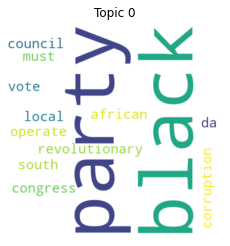

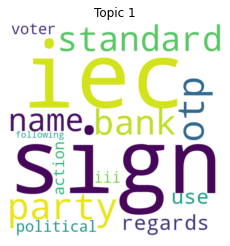

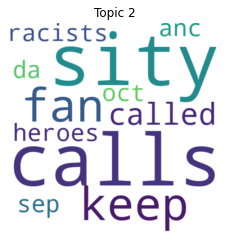

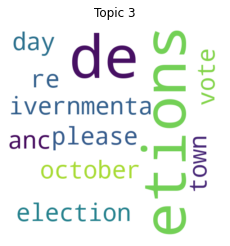

In [40]:
figsize(3,3)
wordcloud_top_words(lda_tfidf, tfidf_feature_names, num_top_words)

In [41]:

vectorizer_tfidf_limit = TfidfVectorizer(stop_words='english', max_features=5000)

vectorizer_tfidf_limit.fit(documents)
X_dtm_tfidf_limit = vectorizer_tfidf_limit.transform(documents)
tfidf_feature_names_limit = vectorizer_tfidf_limit.get_feature_names()

Topic #0: 2021 ivernmenta etions anc da voting south black revolutionary corruption station info org www number za sa government voter sunday
Topic #1: october vote day election id registered govern commit given municipalities business unit operate execute employ pass metro law police action4sa
Topic #2: iec party sign otp 15 heroes sity calls called fan racists sep 20 id 2021 bank standard da anc regards
Topic #3: corruption revolutionary black party african town oct 52 like south congress local hermanmashaba make council pm africa vote naeem happy



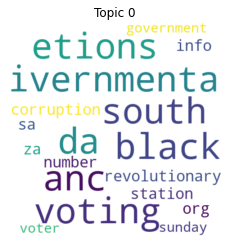

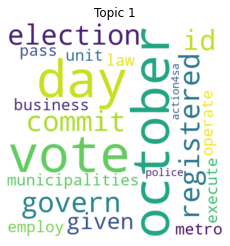

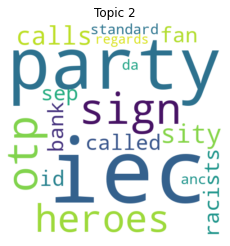

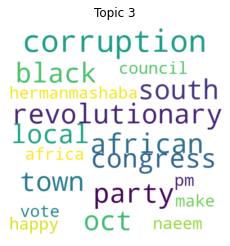

In [42]:
lda_tfidf_limit = fit_LDA(X_dtm_tfidf_limit, n_components)
X_lda_tfidf_limit_membership = lda_tfidf_limit.transform(X_dtm_tfidf_limit)

# Print new topics
print_top_words(lda_tfidf_limit, tfidf_feature_names_limit, num_top_words)
wordcloud_top_words(lda_tfidf_limit, tfidf_feature_names_limit, num_top_words)

Topic #0: 03 11 christian pm 45 vryheit indd social psdf vf plus sp 2014 fbsdf tanc independent sunday sign south friday
Topic #1: iec party otp regards action political voter expires mins process proceed id 2021 use registration application online september 870831 fools
Topic #2: 03 11 christian pm 45 vryheit indd social psdf vf plus sp 2014 fbsdf tanc independent sunday sign south friday
Topic #3: 03 11 christian pm 45 vryheit indd social psdf vf plus sp 2014 fbsdf tanc independent sunday sign south friday
Topic #4: 03 11 christian pm 45 vryheit indd social psdf vf plus sp 2014 fbsdf tanc independent sunday sign south friday
Topic #5: 2021 etions ivernmenta anc christian 03 11 pm 45 social indd vryheit tanc plus fbsdf vf psdf 2014 sp independent
Topic #6: oct hermanmashaba south right replying far 38 quote don country concerned compromised retweets people coffee 924 borders scenes android sovereignty
Topic #7: black revolutionary corruption 03 pm christian 11 45 sp indd tanc 2014 psd

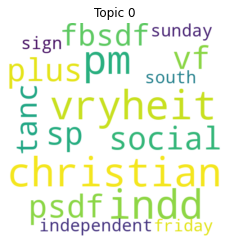

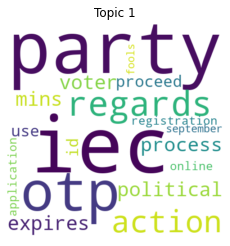

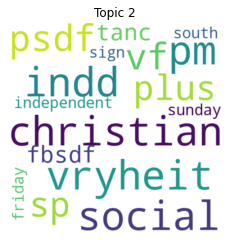

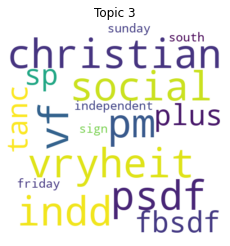

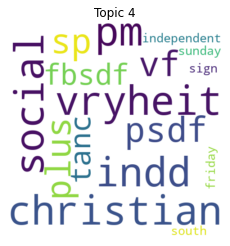

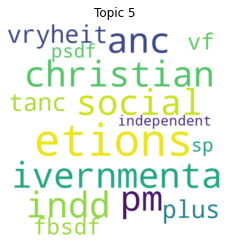

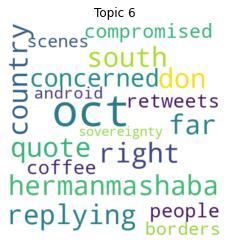

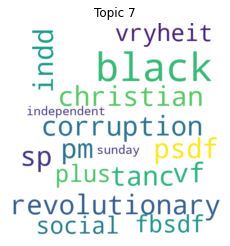

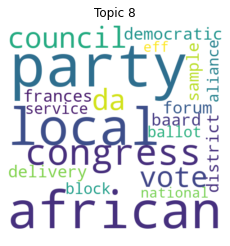

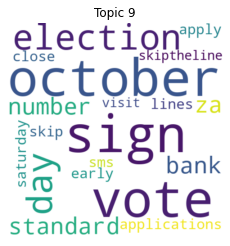

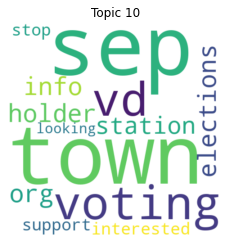

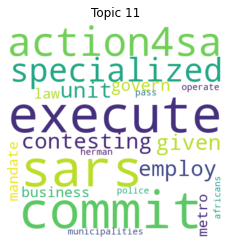

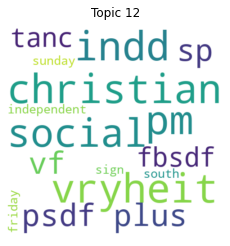

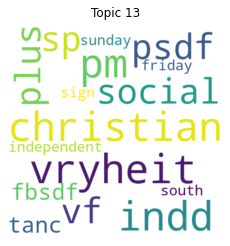

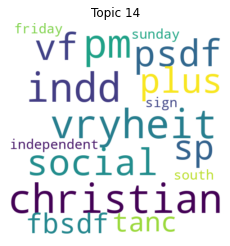

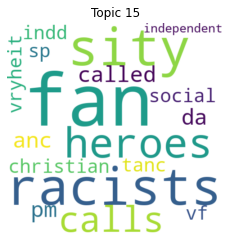

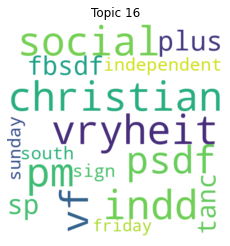

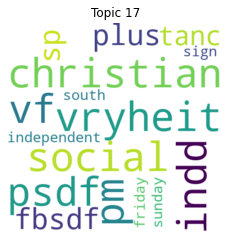

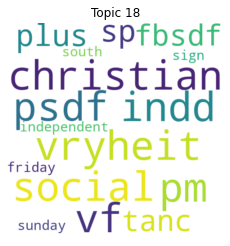

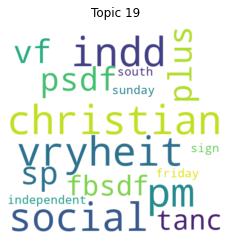

In [43]:
n_components = 20
lda_tfidf_limit = fit_LDA(X_dtm_tfidf_limit, n_components)
X_lda_tfidf_limit_membership = lda_tfidf_limit.transform(X_dtm_tfidf_limit)

# Print new topics
print_top_words(lda_tfidf_limit, tfidf_feature_names_limit, num_top_words)
wordcloud_top_words(lda_tfidf_limit, tfidf_feature_names_limit, num_top_words)

### Non-Negative Factorization

In [44]:
n_components = 4 

In [45]:
def fit_NMF(X, n_components):
    model = NMF(n_components=n_components,random_state=0)
    nmf_tfidf_limit =model.fit(X)
    return nmf_tfidf_limit

In [46]:
nmf_tfidf_limit = fit_NMF(X_dtm_tfidf_limit, n_components)
print_top_words(nmf_tfidf_limit, tfidf_feature_names_limit, num_top_words)

Topic #0: otp 15 id october voter sep 2021 20 vote regards 45 za number www info station org iec 08 voting
Topic #1: party african iec political action local congress government council africa vote south da baard sample democratic district frances delivery forum
Topic #2: hermanmashaba south herman africans mashaba oct metro police mandate commit unit employ govern pass municipalities sars given action4sa business contesting
Topic #3: anc 2021 ivernmenta etions sity heroes fan racists called calls da african congress local council forum sample baard district frances



C:\Users\Mohlatlego\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


###  Stemming and/Lemmatizing

In [47]:
import nltk
from nltk.stem.porter import PorterStemmer

In [48]:

def tokenize(text): 
    punctuations = list(string.punctuation)
    tokens = nltk.word_tokenize(text)
    tokens = [x for x in tokens if x not in punctuations]
    stems = []
    for item in tokens:
        stems.append(PorterStemmer().stem(item)) 
    return stems

In [49]:
vectorizer_tfidf_limit_stem = TfidfVectorizer(tokenizer=tokenize,stop_words='english')

vectorizer_tfidf_limit_stem.fit(documents)
X_dtm_tfidf_limit_stem = vectorizer_tfidf_limit_stem.transform(documents)
tfidf_feature_names_limit_stem = vectorizer_tfidf_limit_stem.get_feature_names()

C:\Users\Mohlatlego\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\Mohlatlego\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaf

In [50]:
n_components = 10 #number of topics

lda_tfidf_limit_stem = fit_LDA(X_dtm_tfidf_limit_stem, n_components)
X_lda_tfidf_limit_membership_stem = lda_tfidf_limit_stem.transform(X_dtm_tfidf_limit_stem)

# Print new topics
print_top_words(lda_tfidf_limit_stem, tfidf_feature_names_limit_stem, num_top_words)

Topic #0: parti follow 20 15:45 sep african iec local congress live action polit vote council christian regist africa govern church c
Topic #1: number regist pm station info vote tanc psdf 2.indd 2014/11/03 sp plu social vf fbsdf independ 3:45 vryheit id vd
Topic #2: pleas town vote special contest commit oper by-law pass busi 1. 2. polic ani action4sa sa sar 4. 3. execut
Topic #3: number regist pm station info vote tanc psdf 2.indd 2014/11/03 sp plu social vf fbsdf independ 3:45 vryheit id vd
Topic #4: octob vote day elect 31 sm skip 32249 4 close appli www.skiptheline.org.za earli line befor ca 30 saturday visit sunday
Topic #5: number regist pm station info vote tanc psdf 2.indd 2014/11/03 sp plu social vf fbsdf independ 3:45 vryheit id vd
Topic #6: sign bank standard creat ssylvest 12:03 custom gmail.com lte selomemmoloki selom s 0799999820 http account 3ul inform 4g 5957 phone
Topic #7: 2021 anc etion ivernmenta hero siti fan racist da number regist pm station info vote 2014/11/03

In [51]:
df

,created_at,asset_text_extracts
0,2021-09-17 08:21:03,PARTY OF ACTION - Political Party IEC Register...
2,2021-09-22 06:21:53,a\n21% I 6:52\nNaeem Patel\n5\nminutes.ag9go\n...
3,2021-09-22 14:20:55,-27820070059\nUse OTP 517392 to proceed with\n...
5,2021-09-25 21:10:02,|
6,2021-09-25 22:09:54,IT IS NOT\nCORRUPTION IF\nIT IS BLACK\n#REVOLU...
7,2021-09-30 09:11:57,SAMPLE BALLOT PAPER\nDISTRICT COUNCIL PARTY VO...
9,2021-10-02 06:36:21,DA\nSkip the lines\nVote early!\nIf you are a ...
12,2021-10-05 15:44:58,THE\nANC\nCALLED\nYOU\nRACISTS\nTHE\nDA\nCALLS...
14,2021-10-08 10:47:34,12:03\n3ul\nVo))\n4G\nS\nLTE\nSign in to Stand...
15,2021-10-08 17:58:23,IVERNMENTA\nETIONS 2021\nDE\nANC\n2021 |


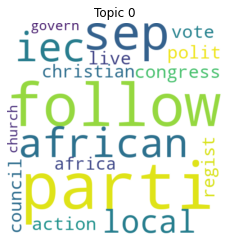

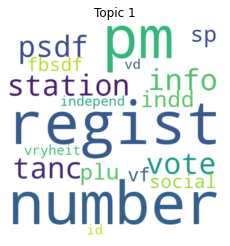

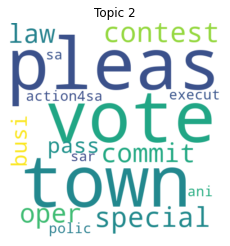

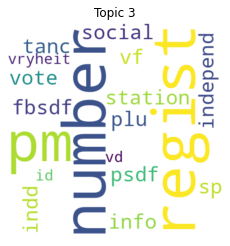

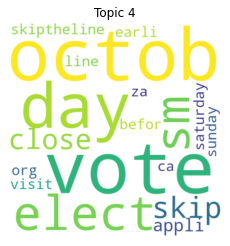

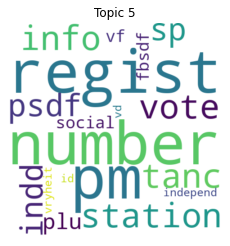

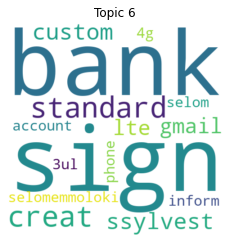

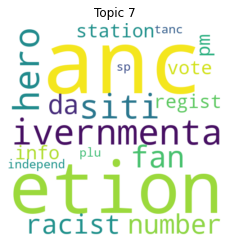

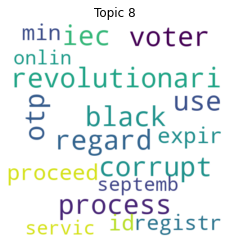

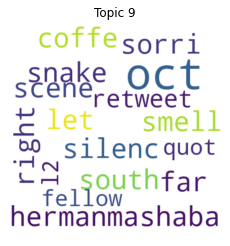

In [52]:
wordcloud_top_words(lda_tfidf_limit_stem, tfidf_feature_names_limit_stem, num_top_words)